##### Topic Modeling with Non-Negative Matrix Factorization using Topic-Coherence Word2Vec (TC-W2V)

This technique of decomposition on a document term matrix (the result of tfidf on text data) outputs two matrices that approximate the original doc-term matrix: $V \approx WH$, where $V$ has the dimension $m x n$. In particular Matrix $H$ has the dimensions $k x n$, where $k$ is the number of topics and $n$ is the terms from tfidf. We can also use matrix $W$ to map the clusters to documents.

Word2vec is run on the original corpus to make a seperate set of word embeddings. Those word embeddings are then used to verify word proximity within clusters output from NMF's decomposition. The top words from each cluster are sorted and compared against eachother using the word2vec embeddings. Scores from each $k$ decomposition are averaged, and the highest score is chosen as the best model. This technique is known as Topic Coherence Word2Vec (TC-W2V). 

References: 
An analysis of the coherence of descriptors in topic modeling, Derek O’Callaghan et. al.

In [1]:
import pandas as pd
from utils import nmfTopicmodel

In [2]:
# read csv into a dataframe, we will only use the text column for topic modeling
df = pd.read_csv('twitter_data_example.csv'); df.head(1)

,Unnamed: 0,tweetId,tweetUrl,username,userId,isRetweet,isPinned,time,text,replies,retweets,likes,entries
0,0,1298749875367145473,/Phdb2009/status/1298749875367145473,Phdb2009,68173067,False,False,2020-08-26 18:31:14,"The #US and #Turkey are #NATO allies, although...",1,0,1,"{'hashtags': ['#US', '#Turkey', '#NATO', '#Kur..."


After loading the dataset from twitter we put it into the Topic_Model class and apply the fit method which: 1) cleans the text, vectorizes it (TFIDF), calculates NMF for default 4 to 15 topics, and calculates word2vec.

It then returns a graph the mean topic coherence score for each k topic run through the model. The topic model class also holds all the data that was collected to include, NMF 2d tensors, word2vec embeddings, tfidf results, coherence scores, and more so you can see the inputs.

cleaning text
vectorizing text
calculating NMF
calculating word2vec


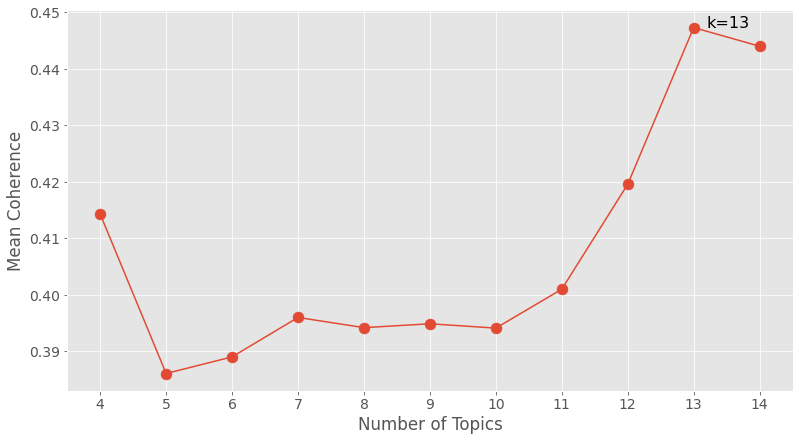

In [3]:
topicModel = nmfTopicmodel.Topic_Model(data=df['text']).fit()

In [4]:
topicModel.coh_score

[0.414243886868159,
 0.38602603077888487,
 0.3889691650867462,
 0.3959478352751051,
 0.3941409119537899,
 0.39483047939009136,
 0.3940601978037092,
 0.4009455798250256,
 0.4195228905589492,
 0.44725228298423636,
 0.4439477920532227]

After you find the best mean coherence score you can use the NMF model with the same number of clusters to look back at your data to see what terms/sentences come from that. 

In [6]:
# to be added to the nmfTopicmodel class

from utils.nmfTopicmodel import top_term, get_top_snippets

topic_index, k = 13,13
W = topicModel.nmf[k][0]
H = topicModel.nmf[k][1]
df = topicModel.original_text
terms = topicModel.tfidf_feature_names

sentences = [headline[0:min(len(headline),300)] for headline in df]
descriptors = [top_term(terms(), H, topic_index, 10) for topic_index in range(k)]

labelled = {}
for i in range(k):
    topic = i
    headlines = 1

    d_ = {i+1: sentences
             for i,sentences in enumerate(get_top_snippets(sentences, W, topic, headlines))
        }
    
    labelled[i] = pd.DataFrame.from_dict(d_, orient='index').rename(columns={0:'ground_truth',
                                                                               1:'NMF categorized'})
    
    temp_ = pd.DataFrame.from_dict(d_, orient='index').rename(columns={0:'ground_truth',
                                                                       1:'NMF categorized'})

    print('#''='*30)
    print(f'top terms for topic {topic}')
    print(descriptors[topic])

    print('='*50)
    gt_top = temp_['ground_truth'].value_counts().index[0]
    print(f'top ground truth label: {gt_top}')

#     print('='*50)
#     print(f'top documents for each topic {topic}')
#     print(temp_)
#     print('')

#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=
top terms for topic 0
['war', 'murder', 'gd', 'militari', 'general', 'utk', 'retribut', 'obliter', 'hom', 'task']
top ground truth label: Russo-Syrian Task Force Obliterates 327 #ISIS Terrorists as Retribution For The Murder of a Russian General https://is.gd/lhYs7f  #Antiterrorism #DeirEzZor #Homs #Military #Russia #Syria #Terrorism #War pic.twitter.com/jLXYmd2uTK
#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=
top terms for topic 1
['captiv', 'beatl', 'behead', 'tri', 'mol', 'im', 'account', 'syria', 'us', 'uk']
top ground truth label: #ISIS 'Beatles' WILL be tried in #US over beheading of captives in #Syria. #accountability
#JusticeForVictims https://mol.im/a/8665953 
#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=#=
top terms for topic 2
['us', 'interrog', 'pakistan', 'terrorist', 'democrat', 'custodi', 'list', 'pakistani', 'complic', 'may']
top ground truth label: #US to probe #Pak’s #ISIS terrori

#### Future steps

-add the text output to the nmfTopicmodel class <br>
-add language ID and translation support <br>
-add support for parameter tuning in pipeline i.e.: tfidf, NMF, word2vec <br>
-clean up output to be used in UI <br>